In [ ]:
%config InlineBackend.figure_format = 'retina'

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sys import setrecursionlimit
import threading
setrecursionlimit(10 ** 9)
threading.stack_size(67108864)

0

# **One-dimensional function minimization**


And Moses stretched out his hand over the sea, and the LORD drove the sea with a strong east wind all night, and made the sea dry land, and the waters parted. And the children of Israel went in the midst of the sea on dry land: the waters were a wall to them on the right and on the left side. 

The waters parted with Moses hand, and for his companions from the shore, the waves was described by the following function:

$y= x^2e^{sin(x)}$

So function $y=x^2e^{sinx}$ is our ${optimality \:criteria}$.


In [ ]:
def func(x):
    return x ** 2 * np.e ** np.sin(x)

arg = np.linspace(-40, 40, 10000)
values = func(arg)

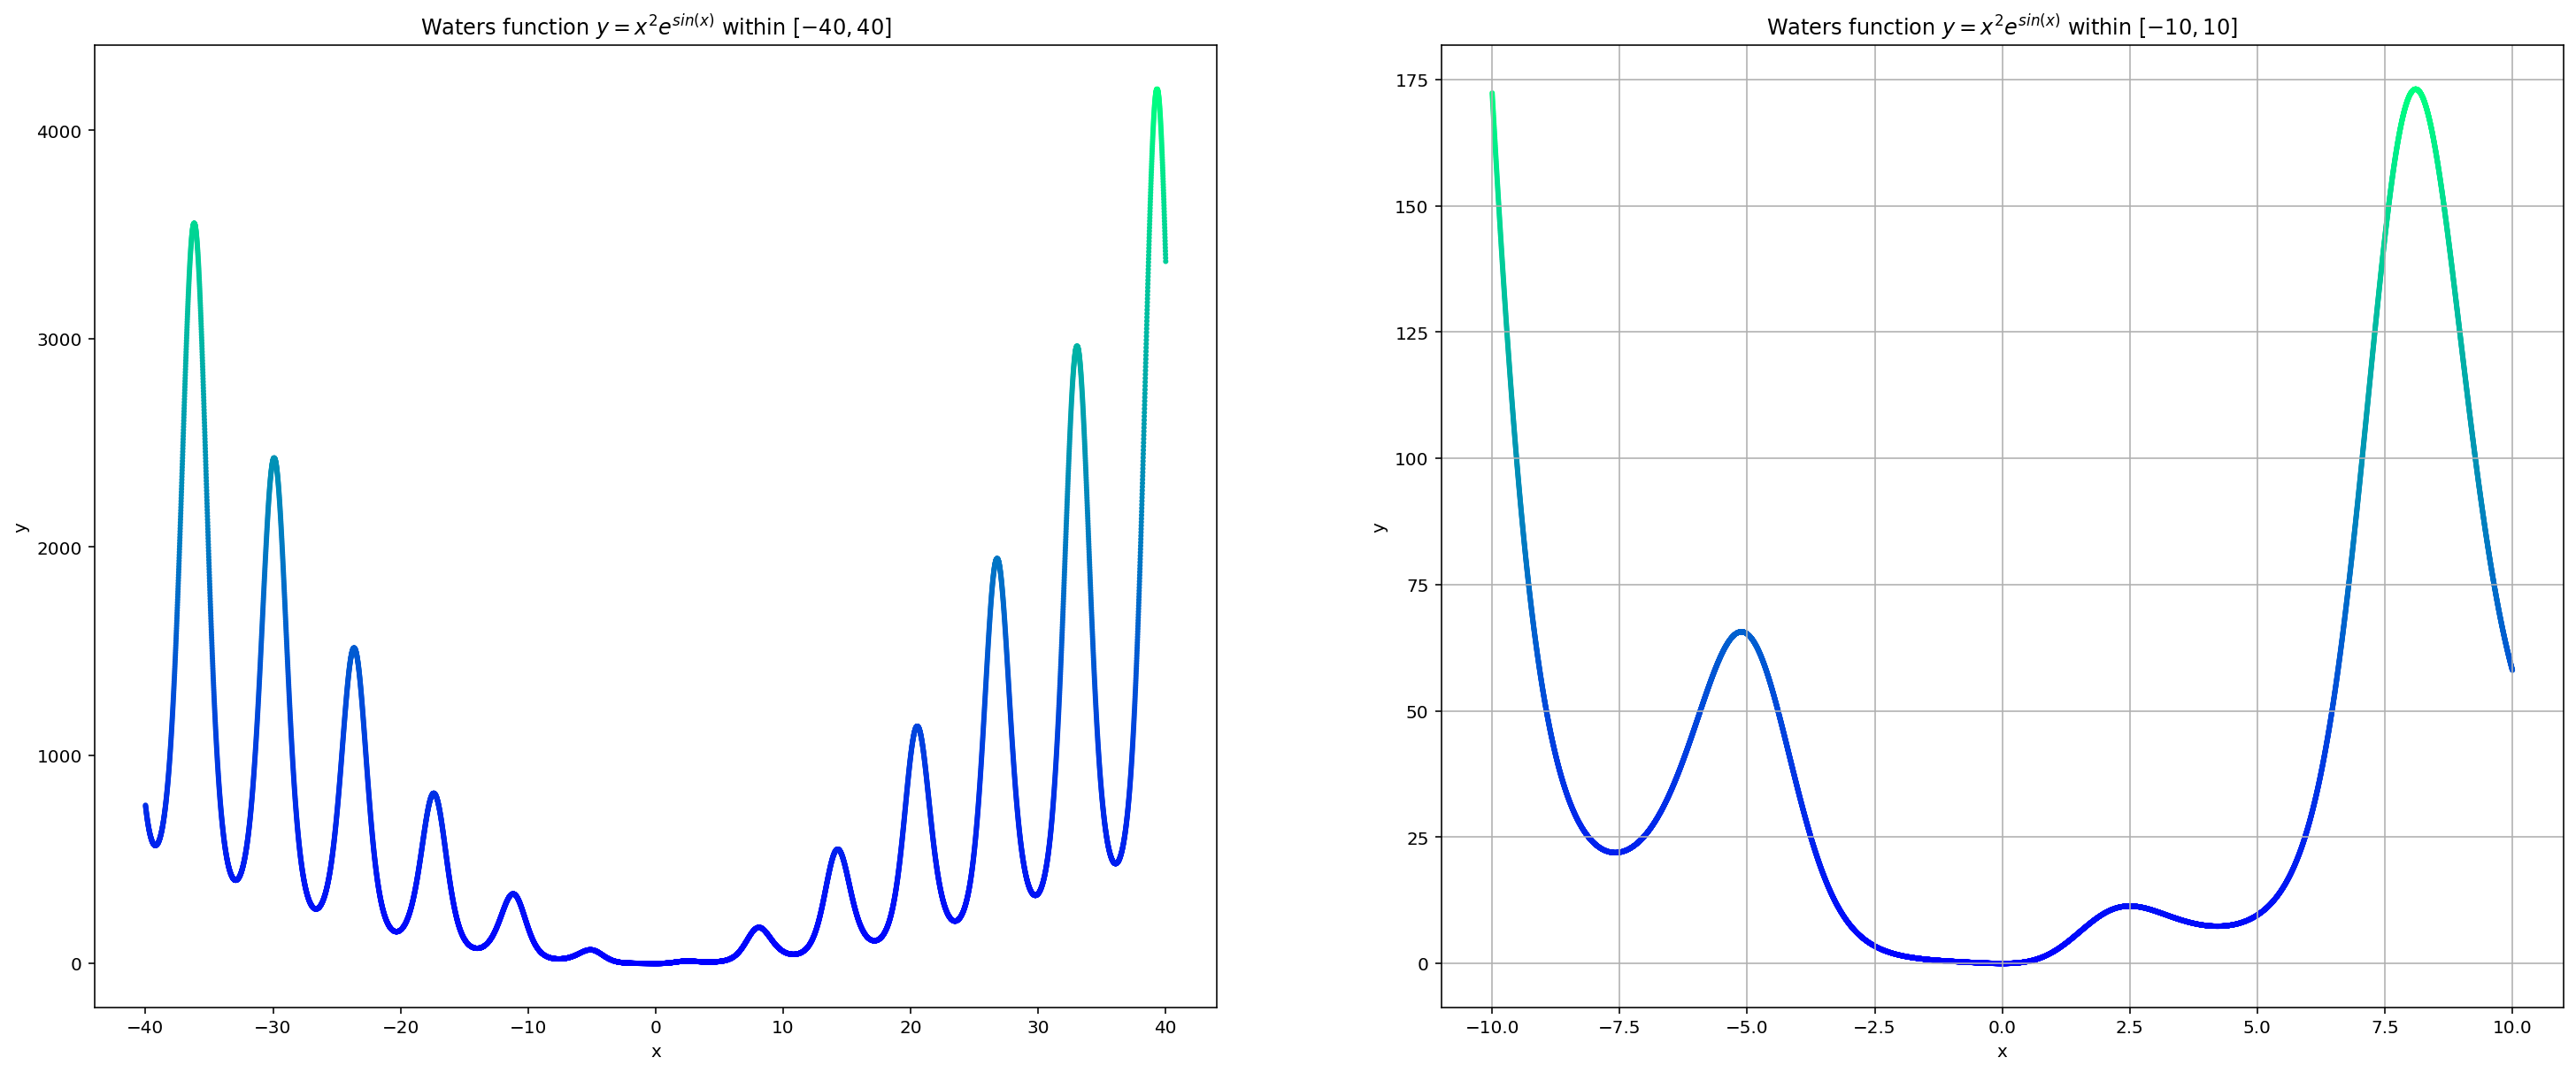

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(25, 10))
ax[0].scatter(x=arg,
           y=values,
           c=values,
           cmap=cm.winter,
           s=4)
ax[0].set_title("Waters function $y=x^2e^{sin(x)}$ within $[-40, 40]$")
ax[0].set(xlabel="x", ylabel="y")
arg_small = np.linspace(-10, 10, 10000)
values_small = func(np.linspace(-10, 10, 10000))
ax[1].scatter(x=arg_small,
           y=values_small,
           c=values_small,
           cmap=cm.winter,
           s=4)
ax[1].set_title("Waters function $y=x^2e^{sin(x)}$ within $[-10, 10]$")
ax[1].set(xlabel="x", ylabel="y")
plt.grid()
plt.show()

### **Dichotomic minimization**

In [ ]:
eps = 10 ** -6
delta = eps / 2
left, right = -5, 2

In [ ]:
def minimize_dichotomic(function, left, right, eps):
    steps = 0
    calls = 0
    history = []
    while abs(left - right) > eps:
        calls += 2
        center = (left + right) / 2
        steps += 1
        history.append([left, right, center])
        if function(center + eps) < function(center - eps):
            left, right = center, right
        elif function(center + eps) > function(center - eps):
            left, right = left, center
        else:
            left, right = center + eps, center - eps
    return (left + right) / 2, steps, history, calls


In [ ]:
optima, steps, history, calls = minimize_dichotomic(func, -2.5, 7.5, eps)

In [ ]:
print(f"Dichotomic minimization completed within {steps} steps\nComputed optimal value: {optima}\nOptimal function value: {func(optima)}")
print(f"Total function calls: {calls}")

Dichotomic minimization completed within 24 steps
Computed optimal value: 4.218436777591705
Optimal function value: 7.377709994478169
Total function calls: 48


In [ ]:
def show_minimizationresults(function, optima, steps, history, labels, minimization_type: str):
    fig, ax = plt.subplots(1, 2, figsize=(25, 10))
    ax[0].scatter(x=arg_small,
            y=values_small,
            c=values_small,
            cmap=cm.winter,
            s=4)
    ax[0].plot(optima, function(optima), 'ro', markersize=12)
    ax[0].set_title("Waters function $y=x^2e^{sin(x)}$ with optima by " + minimization_type +" minimization")
    ax[0].set(xlabel="x", ylabel="y")
    for i in range(len(history[0])):
        ax[1].plot([elem for elem in range(1, steps + 1)], [elem[i] for elem in history], 'o-', linewidth=2, label=labels[i])
    ax[1].set_title(f"Steps of {minimization_type} minimization with left-center-right values")
    ax[1].set(xlabel="Steps", ylabel="left-center-right")
    ax[1].set_xticks([elem for elem in range(1, steps + 1)])
    ax[1].legend()
    plt.grid()
    plt.show()

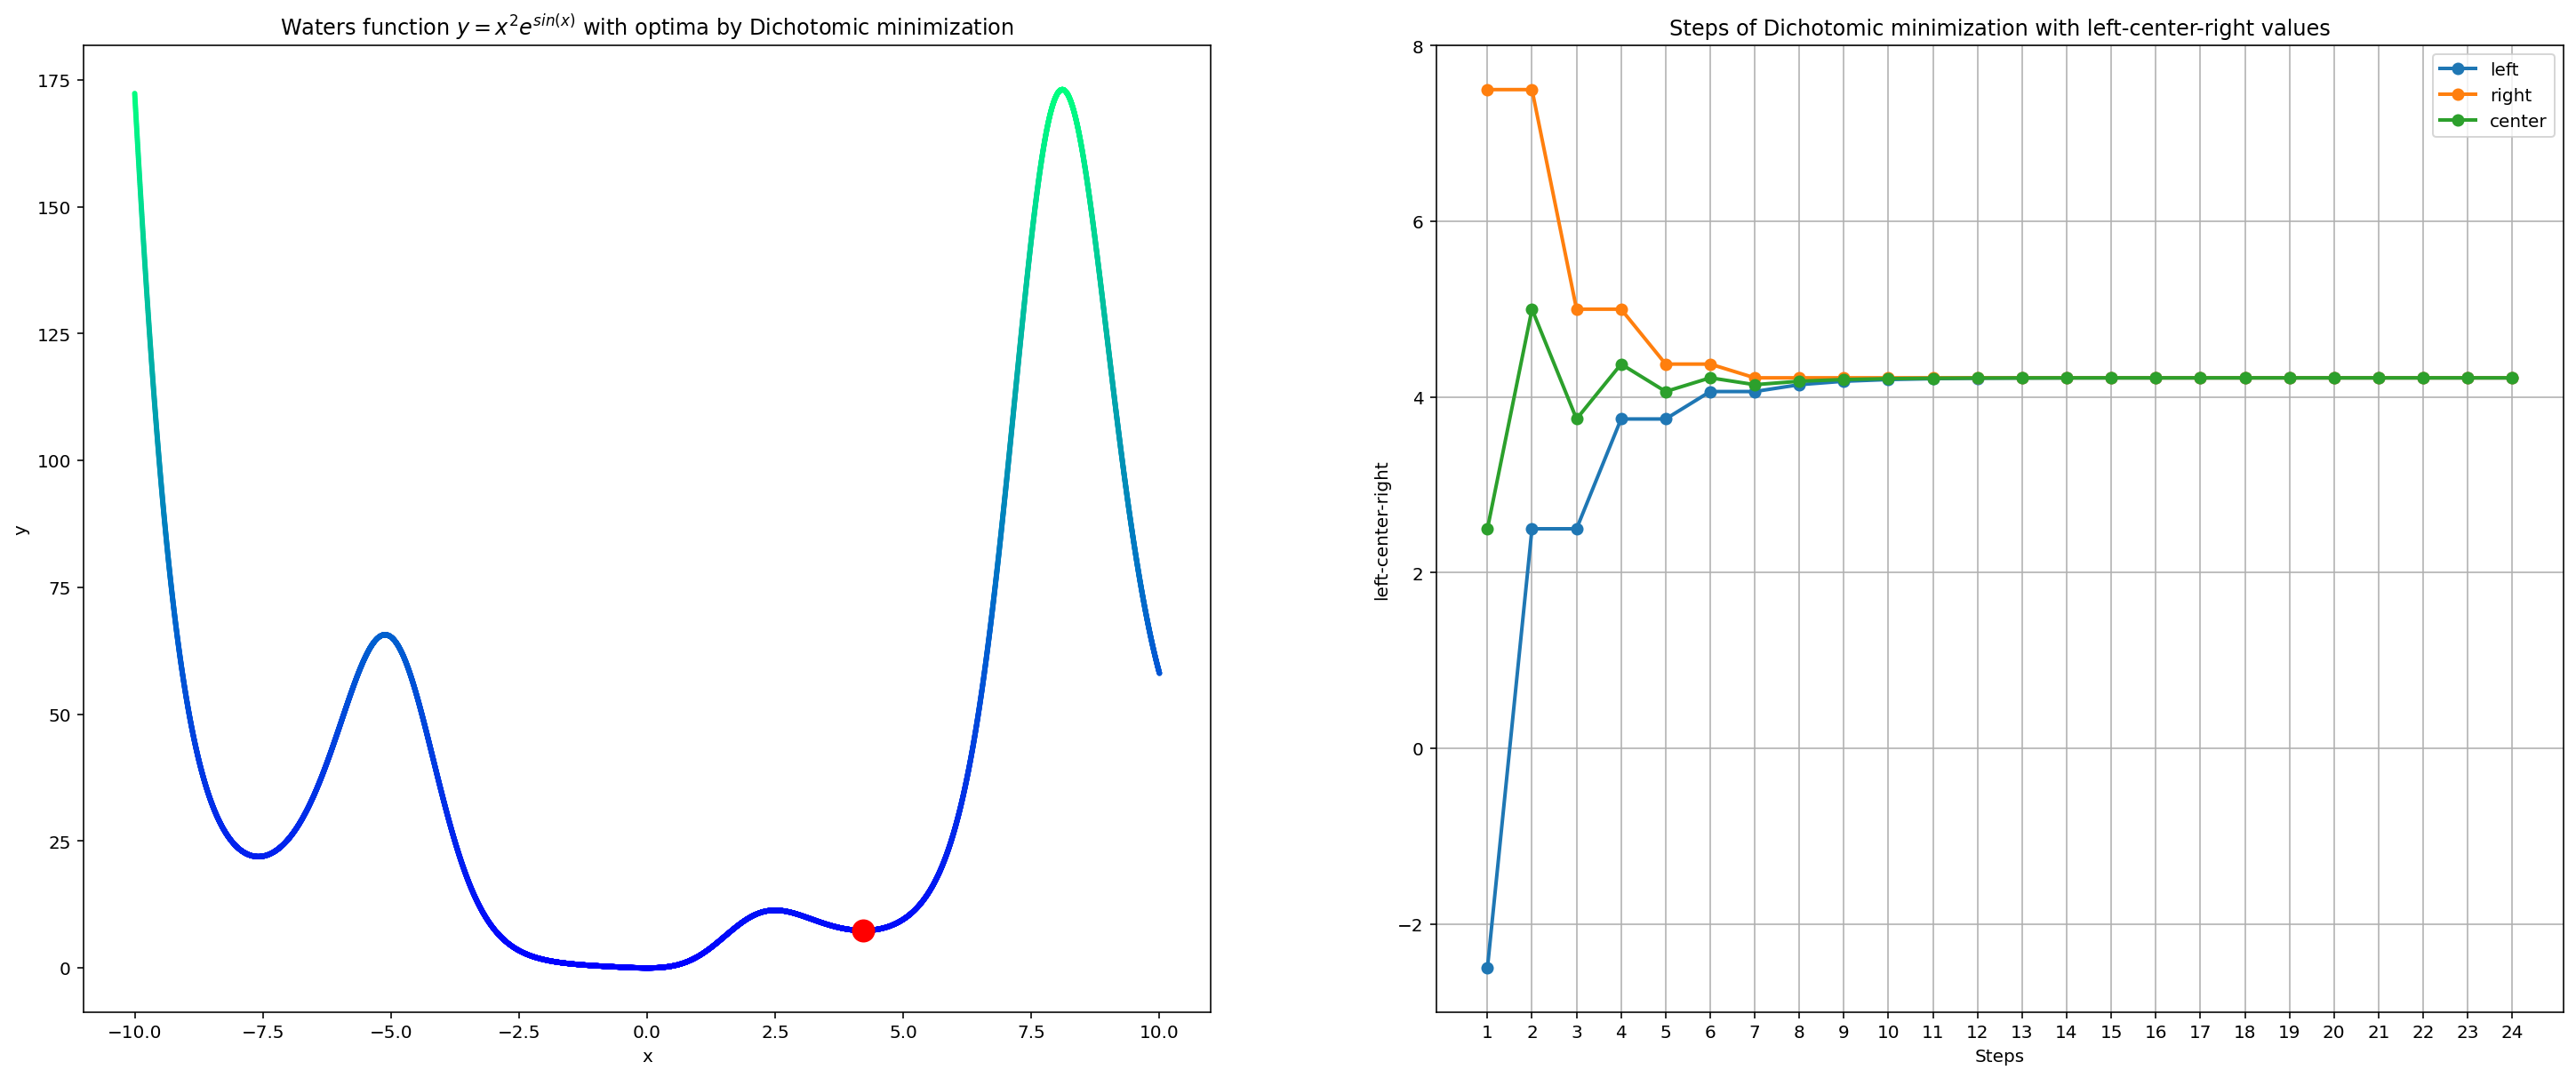

[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]


In [ ]:
show_minimizationresults(func, optima, steps, history, ["left", "right", "center"], "Dichotomic")
history_list = [b-a for a,b,c in history]
print([history_list[i + 1] / history_list[i] for i in range(len(history_list) - 1)])

Let's do some testing for left-right values and find all possible grid intervals


In [ ]:
leftest, rightest = -10, 10
min_step = 1
possible_pairs = [[a, b] for a in np.linspace(leftest, rightest - min_step, 20) for b in np.linspace(a + min_step, rightest, int((rightest - a) / min_step))]
print(possible_pairs)

[[-10.0, -9.0], [-10.0, -8.0], [-10.0, -7.0], [-10.0, -6.0], [-10.0, -5.0], [-10.0, -4.0], [-10.0, -3.0], [-10.0, -2.0], [-10.0, -1.0], [-10.0, 0.0], [-10.0, 1.0], [-10.0, 2.0], [-10.0, 3.0], [-10.0, 4.0], [-10.0, 5.0], [-10.0, 6.0], [-10.0, 7.0], [-10.0, 8.0], [-10.0, 9.0], [-10.0, 10.0], [-9.0, -8.0], [-9.0, -7.0], [-9.0, -6.0], [-9.0, -5.0], [-9.0, -4.0], [-9.0, -3.0], [-9.0, -2.0], [-9.0, -1.0], [-9.0, 0.0], [-9.0, 1.0], [-9.0, 2.0], [-9.0, 3.0], [-9.0, 4.0], [-9.0, 5.0], [-9.0, 6.0], [-9.0, 7.0], [-9.0, 8.0], [-9.0, 9.0], [-9.0, 10.0], [-8.0, -7.0], [-8.0, -6.0], [-8.0, -5.0], [-8.0, -4.0], [-8.0, -3.0], [-8.0, -2.0], [-8.0, -1.0], [-8.0, 0.0], [-8.0, 1.0], [-8.0, 2.0], [-8.0, 3.0], [-8.0, 4.0], [-8.0, 5.0], [-8.0, 6.0], [-8.0, 7.0], [-8.0, 8.0], [-8.0, 9.0], [-8.0, 10.0], [-7.0, -6.0], [-7.0, -5.0], [-7.0, -4.0], [-7.0, -3.0], [-7.0, -2.0], [-7.0, -1.0], [-7.0, 0.0], [-7.0, 1.0], [-7.0, 2.0], [-7.0, 3.0], [-7.0, 4.0], [-7.0, 5.0], [-7.0, 6.0], [-7.0, 7.0], [-7.0, 8.0], [-7.0, 9.0

In [ ]:
optima_final, steps_final, calls_final, history_final = 0, 0, 0, []
pair_final = [left, right]
func_min = func(optima)
all_mins_history = []
for pair in possible_pairs:
    optima_temp, steps_temp, history_temp, calls_temp = minimize_dichotomic(func, pair[0], pair[1], eps)
    if func_min > func(optima_temp):
        func_min = func(optima_temp)
        optima_final, steps_final, history_final, calls_final= optima_temp, steps_temp, history_temp, calls_temp
        pair_final = pair
print("Iterative minimization boost completed!\nBest minimization results:")
print(f"\t{optima_final} - optima\t{func(optima_final)} - optimal criteria")
print(f"Interval: {pair_final}\nSteps: {steps_final}\nFunction Calls: {calls_final}")

Iterative minimization boost completed!
Best minimization results:
	-2.9802322387695312e-08 - optima	8.88178393230346e-16 - optimal criteria
Interval: [-10.0, 1.0]
Steps: 24
Function Calls: 48


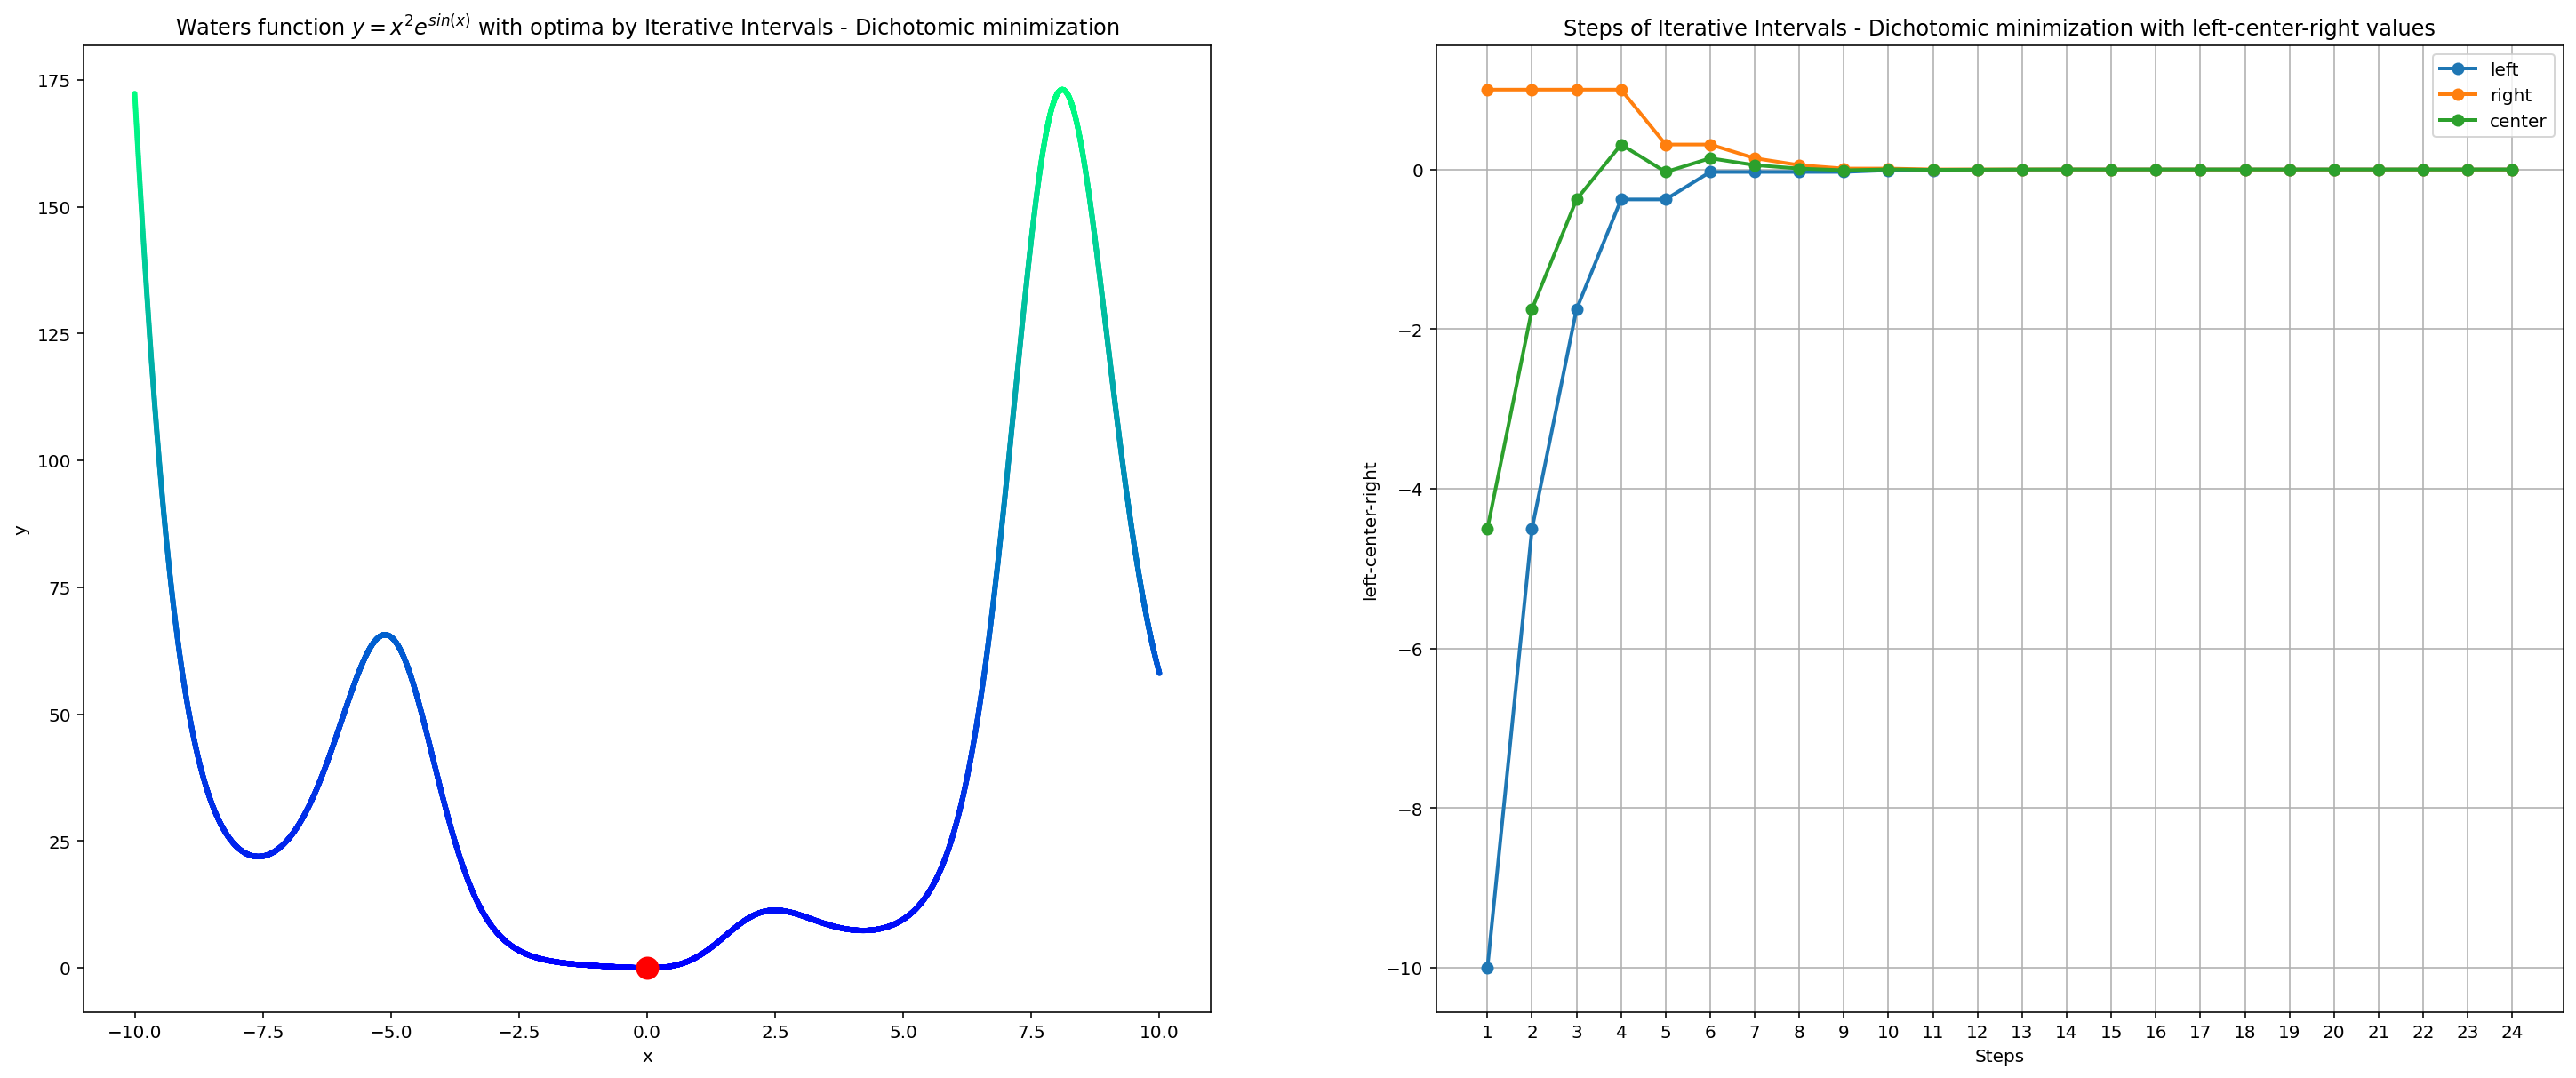

In [ ]:
show_minimizationresults(func, optima_final, steps_final, history_final, ["left", "right", "center"], "Iterative Intervals - Dichotomic")

### **The golden ratio minimization**




In [ ]:
def minimize_goldenratio(function, left, right, eps):
    steps, calls, history = 0, 0, []
    alpha = (3 - math.sqrt(5)) / 2
    subleft = left + (right - left) * alpha
    subright = right - (right - left) * alpha
    value_left, value_right = function(subleft), function(subright)
    calls += 2
    while abs(left - right) > eps:
        steps += 1
        history.append([left, right, subleft, subright])
        if value_left >= value_right:
            left = subleft
            subleft = subright
            subright = right - (right - left) * alpha
            value_left, value_right = value_right, function(subright)
            calls += 1
        else:
            right = subright
            subright = subleft
            subleft = left + (right - left) * alpha
            value_left, value_right = function(subleft), value_left
            calls += 1

    return (left + right) / 2, steps, history, calls

In [ ]:
optima_goldenratio, steps_goldenratio, history_goldenratio, calls_goldenratio = minimize_goldenratio(func, left, right, eps)

In [ ]:
print(f"Golden Ratio minimization completed within {steps_goldenratio} steps\nComputed optimal value: {optima_goldenratio}\nOptimal function value: {func(optima_goldenratio)}")
print(f"Total function calls: {calls_goldenratio}")

Golden Ratio minimization completed within 33 steps
Computed optimal value: -3.34888284215944e-08
Optimal function value: 1.1215015914932138e-15
Total function calls: 35


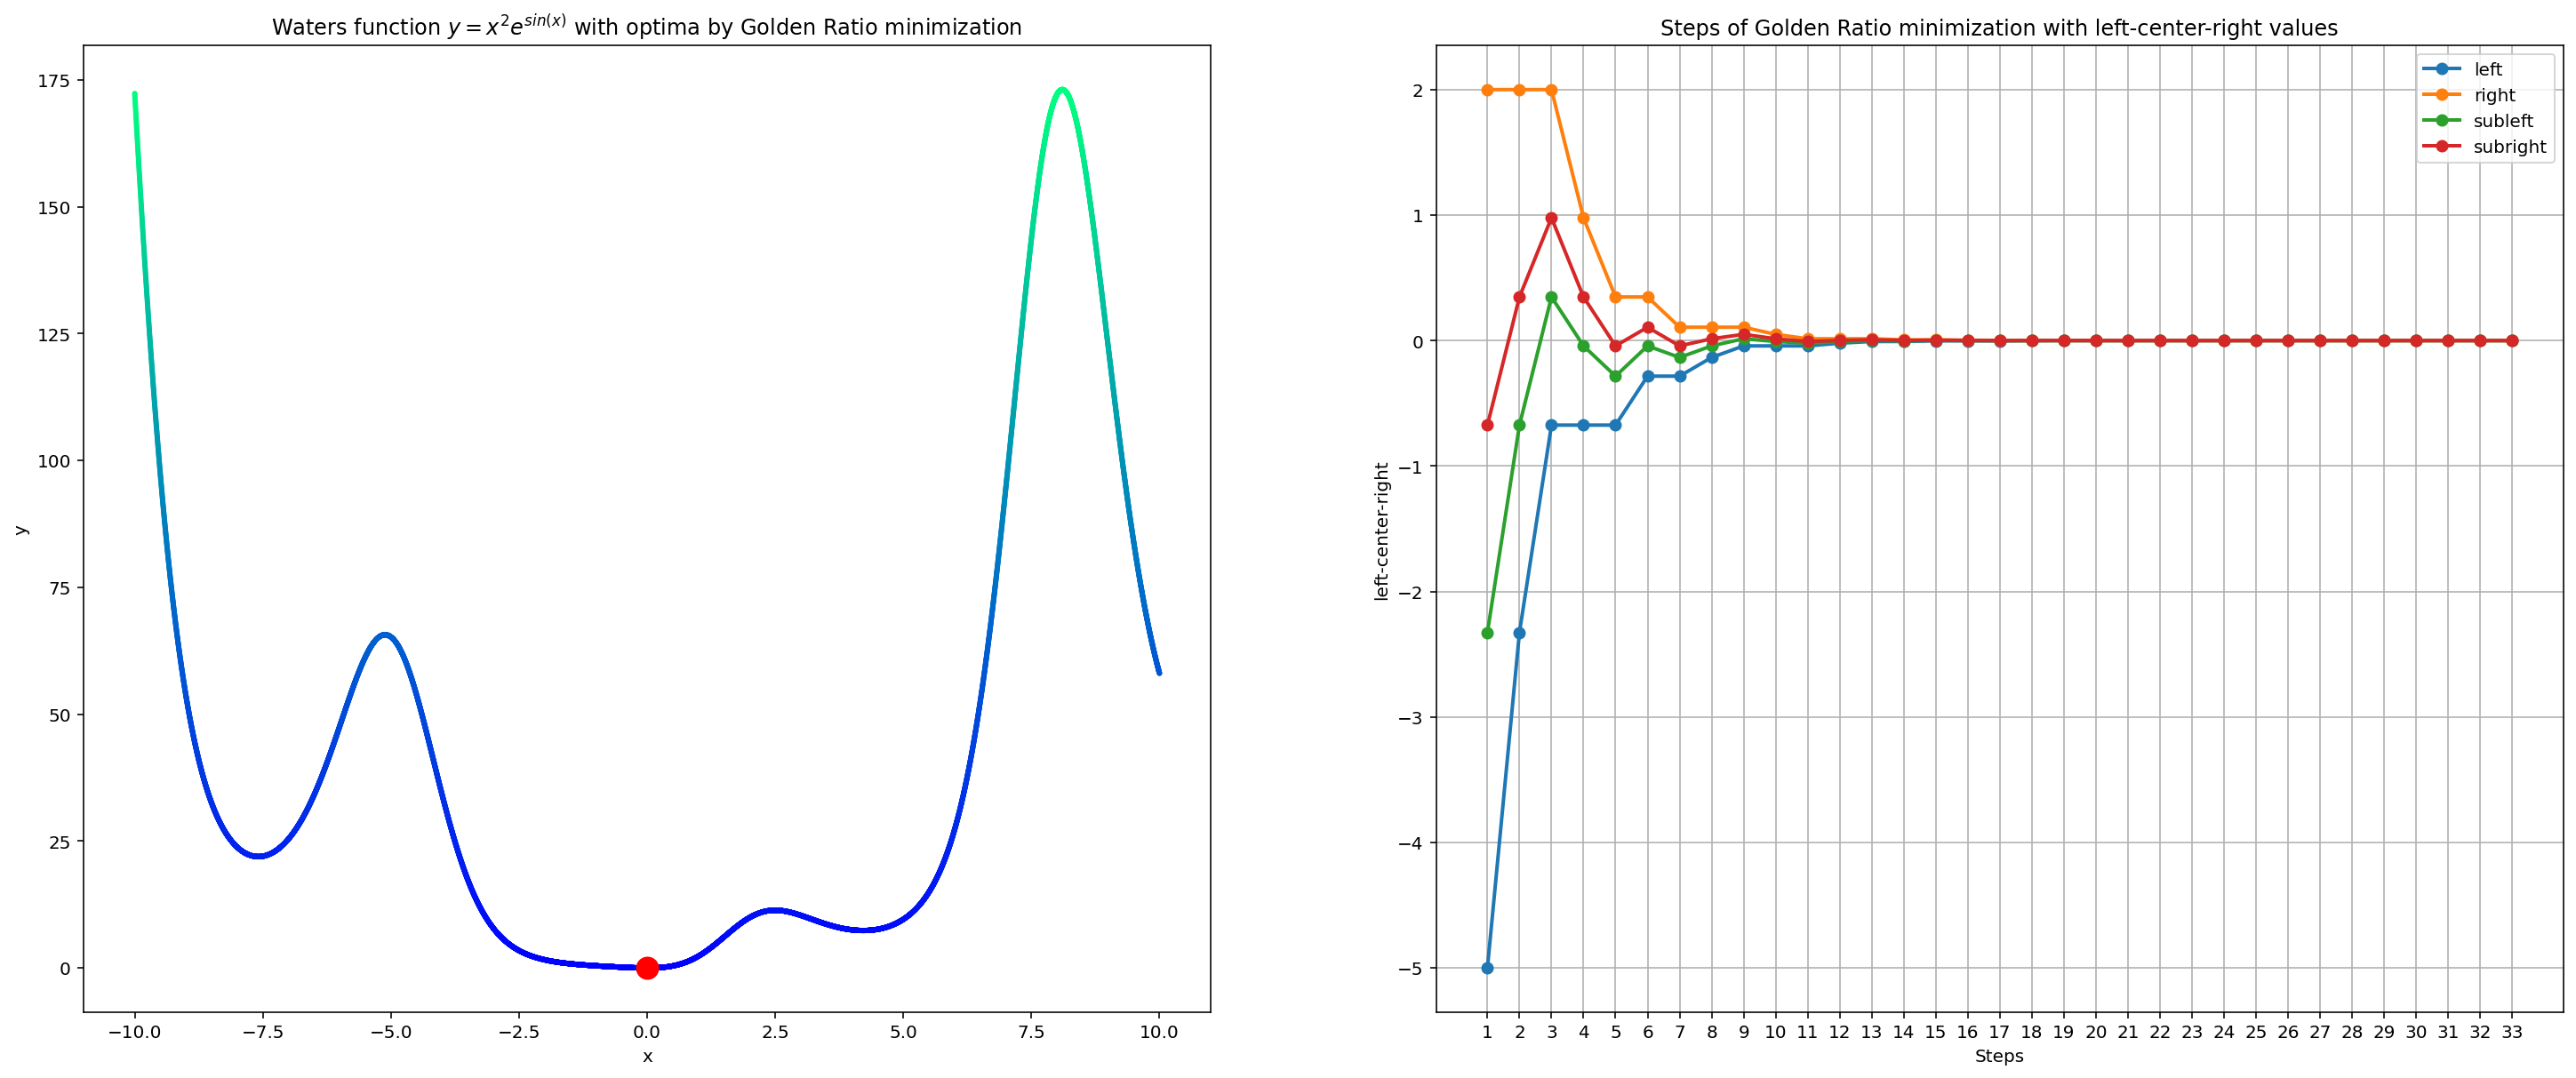

In [ ]:
show_minimizationresults(func, optima_goldenratio, steps_goldenratio, history_goldenratio, ["left", "right", "subleft", "subright"], "Golden Ratio")

In [ ]:
history_list = [b-a for a,b,c,d in history_goldenratio]
print([history_list[i + 1] / history_list[i] for i in range(len(history_list) - 1)])

[0.6180339887498949, 0.6180339887498947, 0.6180339887498949, 0.6180339887498948, 0.6180339887498949, 0.6180339887498949, 0.618033988749895, 0.6180339887498945, 0.6180339887498949, 0.6180339887498943, 0.6180339887498949, 0.6180339887498941, 0.6180339887498949, 0.6180339887498949, 0.6180339887498948, 0.6180339887498921, 0.618033988749895, 0.6180339887498902, 0.6180339887498949, 0.6180339887498876, 0.6180339887498949, 0.618033988749895, 0.6180339887498949, 0.6180339887498645, 0.6180339887498949, 0.6180339887498457, 0.6180339887498949, 0.6180339887498154, 0.6180339887498949, 0.618033988749895, 0.6180339887498949, 0.6180339887495588]


### **Fibonacci minimization**

In [ ]:
def get_fibonacci(n):
    f1, f2 = 0, 1
    for _ in range(n):
        f1, f2 = f2, f1 + f2
    return f1

def get_closest_fibonacci_num(N):
    f1, f2, cnt = 0, 1, 0
    while f1 < N:
        cnt += 1
        f1, f2 = f2, f1 + f2
    return cnt

In [ ]:
def minimize_fibonacci(function, left, right, eps):
    steps, calls, history = 0, 0, []
    start_index = get_closest_fibonacci_num(abs(left - right) / eps)
    start_fib, prepre_fib = get_fibonacci(start_index), get_fibonacci(start_index - 2)
    alpha = prepre_fib / start_fib
    subleft = left + (right - left) * alpha
    subright = right - (right - left) * alpha
    value_left, value_right = function(subleft), function(subright)
    calls += 2
    while steps != start_index - 2:
        steps += 1
        history.append([left, right, subleft, subright])
        if value_left >= value_right:
            left = subleft
            subleft = subright
            subright = right - (right - left) * get_fibonacci(start_index - steps - 2) / get_fibonacci(start_index - steps)
            value_left, value_right = value_right, function(subright)
            calls += 1
        else:
            right = subright
            subright = subleft
            subleft = left + (right - left) * get_fibonacci(start_index - steps - 2) / get_fibonacci(start_index - steps)
            value_left, value_right = function(subleft), value_left
            calls += 1
    return (left + right) / 2, steps, history, calls

In [ ]:
optima_fib, steps_fib, history_fib, calls_fib = minimize_fibonacci(func, left, right, eps)

In [ ]:
print(f"Fibonacci minimization completed within {steps_fib} steps\nComputed optimal value: {optima_fib}\nOptimal function value: {func(optima_fib)}")
print(f"Total function calls: {calls_fib}")

Fibonacci minimization completed within 33 steps
Computed optimal value: -7.044188192514652e-07
Optimal function value: 4.962055233789963e-13
Total function calls: 35


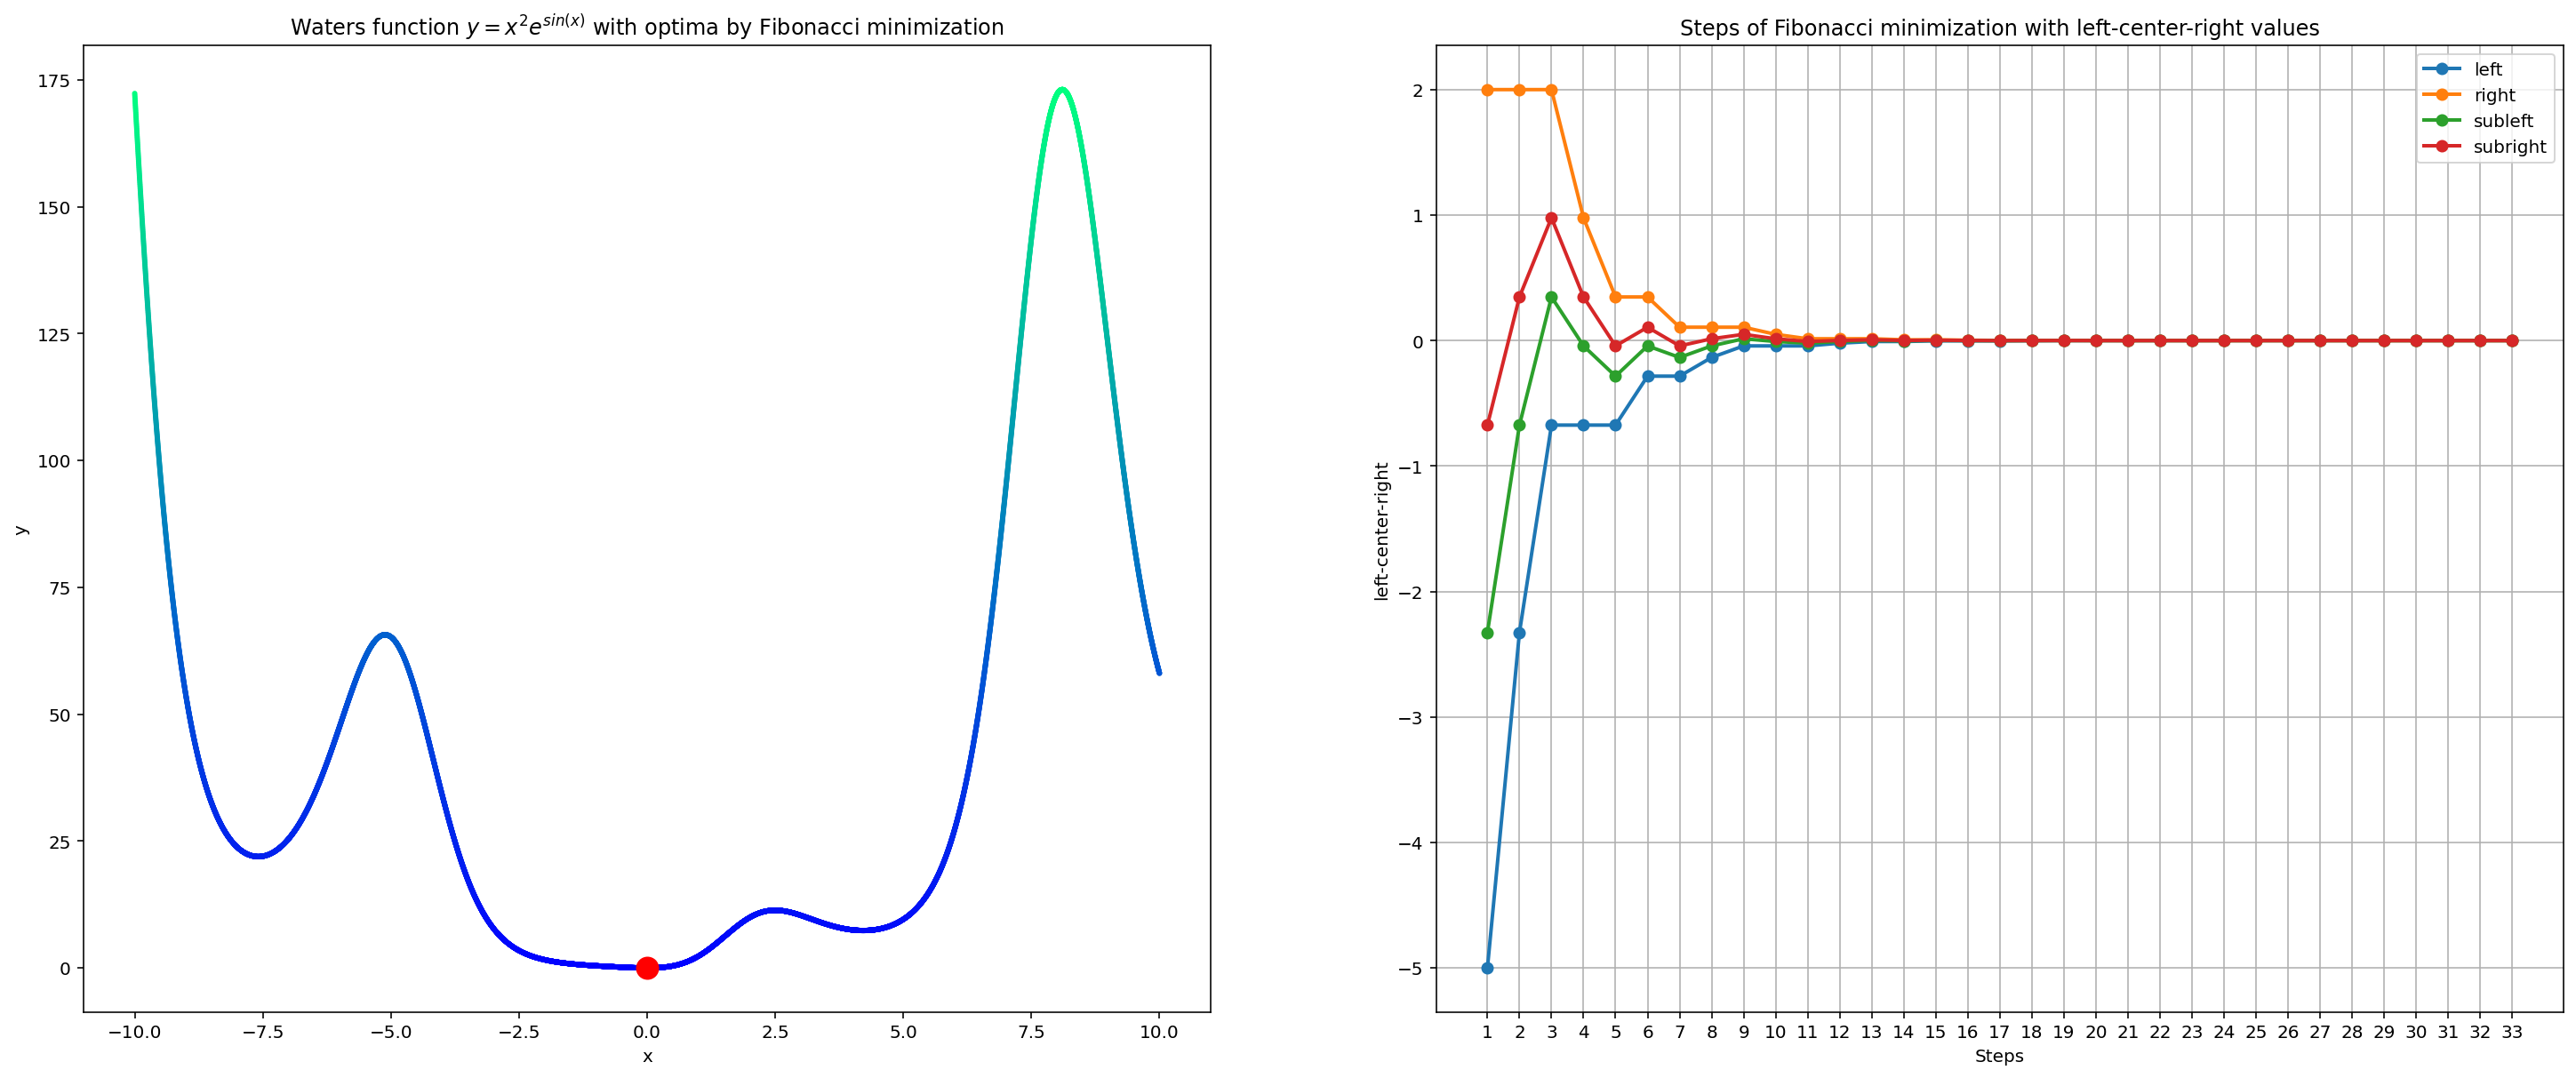

In [ ]:
show_minimizationresults(func, optima_fib, steps_fib, history_fib, ["left", "right", "subleft", "subright"], "Fibonacci")

In [ ]:
history_list = [b-a for a,b,c,d in history_fib]
print([history_list[i + 1] / history_list[i] for i in range(len(history_list) - 1)])

[0.6180339887498896, 0.6180339887499087, 0.6180339887498588, 0.6180339887499892, 0.6180339887496481, 0.6180339887505409, 0.6180339887482035, 0.6180339887543229, 0.6180339887383031, 0.6180339887802432, 0.6180339886704432, 0.6180339889579027, 0.6180339882053251, 0.618033990175597, 0.6180339850173581, 0.6180339985218067, 0.6180339631667066, 0.6180340557275595, 0.6180338134001253, 0.6180344478216905, 0.618032786885246, 0.6180371352785144, 0.6180257510729615, 0.6180555555555919, 0.6179775280898876, 0.6181818181818771, 0.6176470588235294, 0.6190476190477143, 0.6153846153846154, 0.6249999999999999, 0.6000000000000001, 0.6666666666670772]


### **Parabolic minimization**

Interpolation with:

$p(x)=ax^2+bx+c$

$\left\{\begin{matrix}
ax_1^2+bx_1+c=f(x_1) \\ ax_2^2+bx_2+c=f(x_2)\\ax_3^2+bx_3+c=f(x_3)
\end{matrix}\right.$

$\left\{\begin{matrix}
a(x_1^2-x_2^2)+b(x_1-x_2)=f(x_1)-f(x_2) \\ a(x_2^2-x_3^2)+b(x_2-x_3)=f(x_2)-f(x_3)
\end{matrix}\right.$

$\begin{pmatrix}x_1^2-x_2^2 & x_1-x_2 \\ x_2^2-x_3^2 & x_2-x_3 \\ \end{pmatrix} \cdot \begin{pmatrix} a \\ b \\ \end{pmatrix} = \begin{pmatrix} f(x_1)-f(x_2)  \\f(x_2)-f(x_3)\\ \end{pmatrix}$

$\begin{pmatrix} a \\ b \\ \end{pmatrix} = \begin{pmatrix}x_1^2-x_2^2 & x_1-x_2 \\ x_2^2-x_3^2 & x_2-x_3 \\ \end{pmatrix}^{-1} \cdot \begin{pmatrix} f(x_1)-f(x_2)  \\ f(x_2)-f(x_3)\\ \end{pmatrix} = \begin{pmatrix}x_2-x_3 & x_2-x_1 \\ x_3^2-x_2^2 & x_1^2-x_2^2 \\ \end{pmatrix} \cdot \begin{pmatrix} f(x_1)-f(x_2)  \\ f(x_2)-f(x_3)\\ \end{pmatrix}$

$\begin{pmatrix} a \\ b \\ \end{pmatrix} = \begin{pmatrix} (f(x_1)-f(x_2))(x_2-x_3) + (f(x_2)-f(x_3))(x_2-x_1) \\ (f(x_1)-f(x_2))(x_3^2-x_2^2) + (f(x_2)-f(x_3))(x_1^2-x_2^2)\end{pmatrix}$

$x_{min}=\frac{-b}{2a} = - \frac{1}{2} \cdot \frac{(f(x_1)-f(x_2))(x_3^2-x_2^2) + (f(x_2)-f(x_3))(x_1^2-x_2^2)}{(f(x_1)-f(x_2))(x_2-x_3) + (f(x_2)-f(x_3))(x_2-x_1)}$

In [ ]:
def get_xmin(x1, f1, x2, f2, x3, f3):
    f12, f23 = f1 - f2, f2 - f3
    x21, x23 = x2 - x1, x2 - x3
    xsq32, xsq12 = x3 ** 2 - x2 ** 2, x1 ** 2 - x2 ** 2
    return -0.5 * (f12 * xsq32 + f23 * xsq12) / (f12 * x23 + f23 * x21)

def minimize_parabolic(function, left, right, eps):
    steps, calls, history = 0, 0, []
    center = (left + right) / 2
    value_left, value_center, value_right = function(left), function(center), function(right)
    calls += 3
    while value_left < value_center or value_right < value_center:
        if value_center > value_left:
            right = center
            value_right = value_center
            center = (left + right) / 2
            value_center = function(center)
            calls += 1
        elif value_center > value_right:
            left = center
            value_left = value_center
            center = (left + right) / 2
            value_center = function(center)
            calls += 1
        else:
            break
    # x_min in [left, right]
    # f(center) < f(left), f(right)
    x_min = get_xmin(left, value_left, center, value_center, right, value_right)
    while True:
        steps += 1
        history.append([left, right, center, x_min])
        value_x_min = function(x_min)
        calls += 1
        if left < x_min < center and value_x_min > value_center:
            left, value_left = x_min, value_x_min
        elif left < x_min < center and value_x_min < value_center:
            right, value_right = center, value_center
            center, value_center = x_min, value_x_min
        elif center < x_min < right and value_x_min > value_center:
            right, value_right = x_min, value_x_min
        elif center < x_min < right and value_x_min < value_center:
            left, value_left = center, value_center
            center, value_center = x_min, value_x_min
        x_min_new = get_xmin(left, value_left, center, value_center, right, value_right)
        if abs(x_min - x_min_new) <= eps:
            return x_min, steps, history, calls
        x_min = x_min_new

In [ ]:
optima_parabolic, steps_parabolic, history_parabolic, calls_parabolic = minimize_parabolic(func, left, right, eps)
# optima_parabolic_test, steps_parabolic_test, history_parabolic_test, calls_parabolic_test = minimize_parabolic(func, -2, 3, eps)

In [ ]:
print(f"Parabolic minimization completed within {steps_parabolic} steps\nComputed optimal value: {optima_parabolic}\nOptimal function value: {func(optima_parabolic)}")
print(f"Total function calls: {calls_parabolic}")

Parabolic minimization completed within 37 steps
Computed optimal value: -3.0768096162092706e-06
Optimal function value: 9.466728287032402e-12
Total function calls: 40


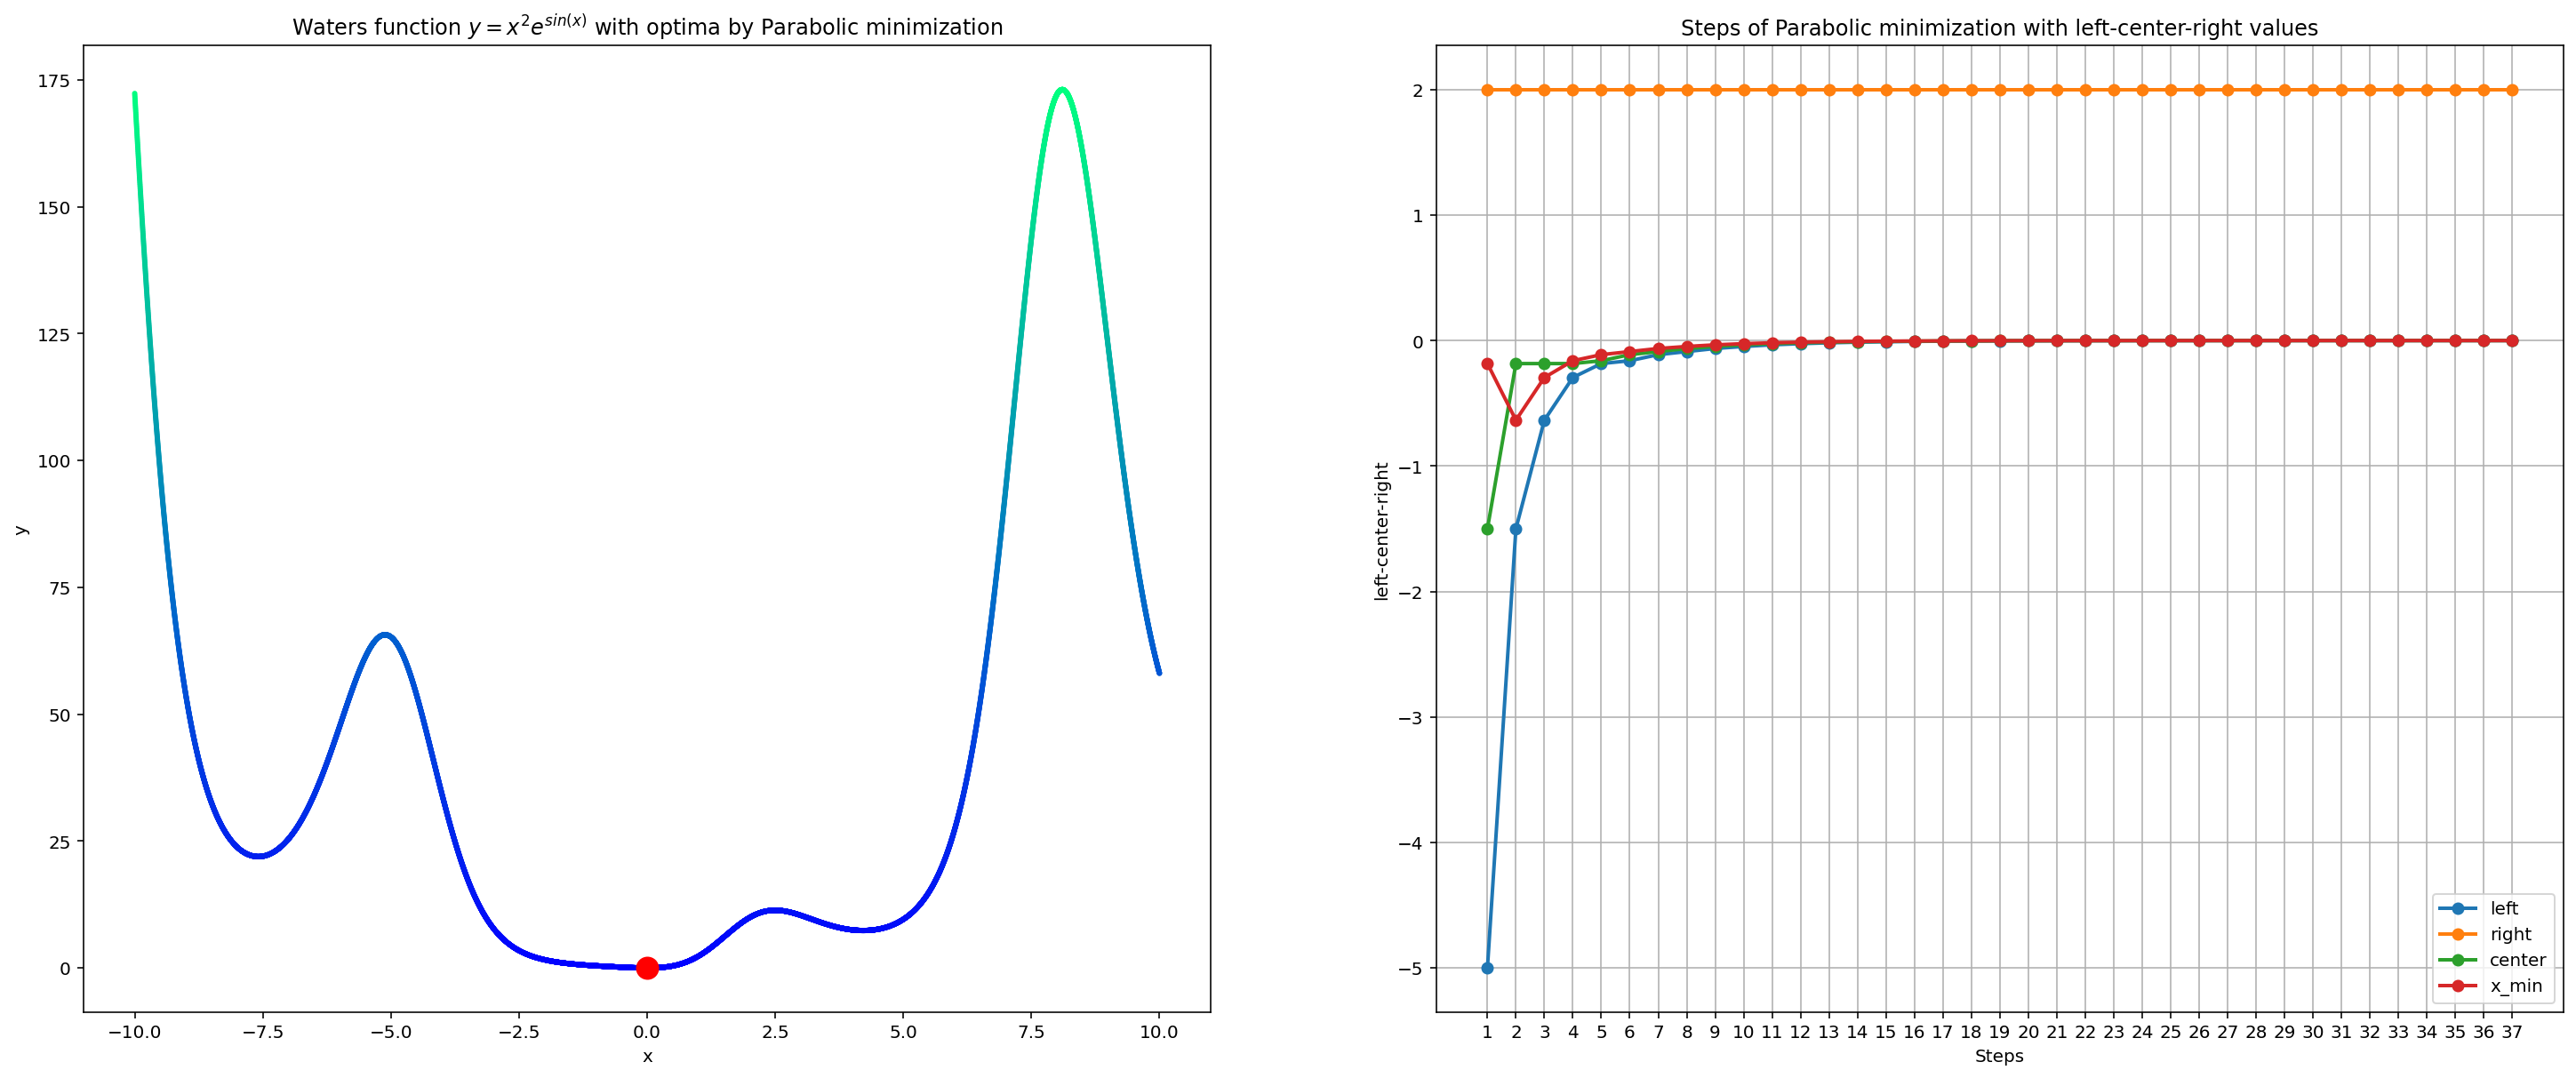

In [ ]:
show_minimizationresults(func, optima_parabolic, steps_parabolic, history_parabolic, ["left", "right", "center", "x_min"], "Parabolic")
# show_minimizationresults(func, optima_parabolic_test, steps_parabolic_test, history_parabolic_test, ["left", "right", "center", "x_min"], "ParabolicTest")

### **Brent combined minimization**

In [ ]:
def minimize_brent(function, left, right, eps):
    def get_sign(a, b):
        return 1 if a >= b else -1

    def get_parabola_xmin(x1, f1, x2, f2, x3, f3):
        f12, f23 = f1 - f2, f2 - f3
        x21, x23 = x2 - x1, x2 - x3
        xsq32, xsq12 = x3 ** 2 - x2 ** 2, x1 ** 2 - x2 ** 2
        assert f12 * x23 + f23 * x21 != 0, "Computed float values not accurate enough\nTry changing convergence parameter (eps)"
        return -0.5 * (f12 * xsq32 + f23 * xsq12) / (f12 * x23 + f23 * x21)

    def check_inequality(a, b, c):
        return a != b and a != c and b != c

    steps, calls, history = 0, 0, []
    alpha = (3 - math.sqrt(5)) / 2
    k = 0.1
    center = (left + right) / 2
    value_center = function(center)
    calls += 1

    min1 = min2 = min3 = center
    value_min1 = value_min2 = value_min3 = value_center
    current_len = prev_len = math.fabs(left - right)
    while math.fabs(right - left) > eps and current_len > eps:
        steps += 1
        preprev_len, prev_len = prev_len, current_len
        x_min = None

        if x_min is not None and min(math.fabs(x_min - right), math.fabs(x_min - left)) <= eps * 10:
            print("Minimization interrupted!")
            break

        if check_inequality(min1, min2, min3) and check_inequality(value_min1, value_min2, value_min3):
            x_min = get_parabola_xmin(min1, value_min1, min2, value_min2, min3, value_min3)
        if x_min is not None and left + eps <= x_min <= right - eps and math.fabs(x_min - min1) < preprev_len / 2:
            current_len = math.fabs(x_min - min1)
        else:
            if min1 < (right - left) / 2:
                # golden ration [min1, right]
                current_len = right - min1
                x_min = min1 + current_len * alpha
            else:
                # golden ration [left, min1]
                current_len = min1 - left
                x_min = min1 - current_len * alpha
        history.append([left, right, min1, min2, min3, x_min])
        if x_min is not None:
            # if math.fabs(x_min - min1) < eps:
            #     x_min = min1 + get_sign(x_min, min1) * eps
            value_x_min = function(x_min)
            calls += 1
            if value_x_min <= value_min1:
                if x_min >= min1:
                    left = min1
                else:
                    right = min1
                min3, min2, min1 = min2, min1, x_min
                value_min3, value_min2, value_min1 = value_min2, value_min1, value_x_min                
            else:
                if x_min >= min1:
                    right = x_min
                else:
                    left = x_min
                if value_x_min <= value_min2 or min2 == min1:
                    min3, min2 = min2, x_min
                    value_min3, value_min2 = value_min2, value_x_min
                elif value_x_min <= value_min3 or min3 == min2 or min3 == min1:
                    min3 = x_min
                    value_min3 = value_x_min
    return x_min, steps, history, calls

In [ ]:
toptima_brent, tsteps_brent, thistory_brent, tcalls_brent = minimize_brent(func, -5, 2.5, eps)

In [ ]:
print(f"Brent minimization completed within {tsteps_brent} steps\nComputed optimal value: {toptima_brent}\nOptimal function value: {func(toptima_brent)}")
print(f"Total function calls: {tcalls_brent}")

Brent minimization completed within 10 steps
Computed optimal value: 5.5667878187159446e-09
Optimal function value: 3.098912679111412e-17
Total function calls: 11


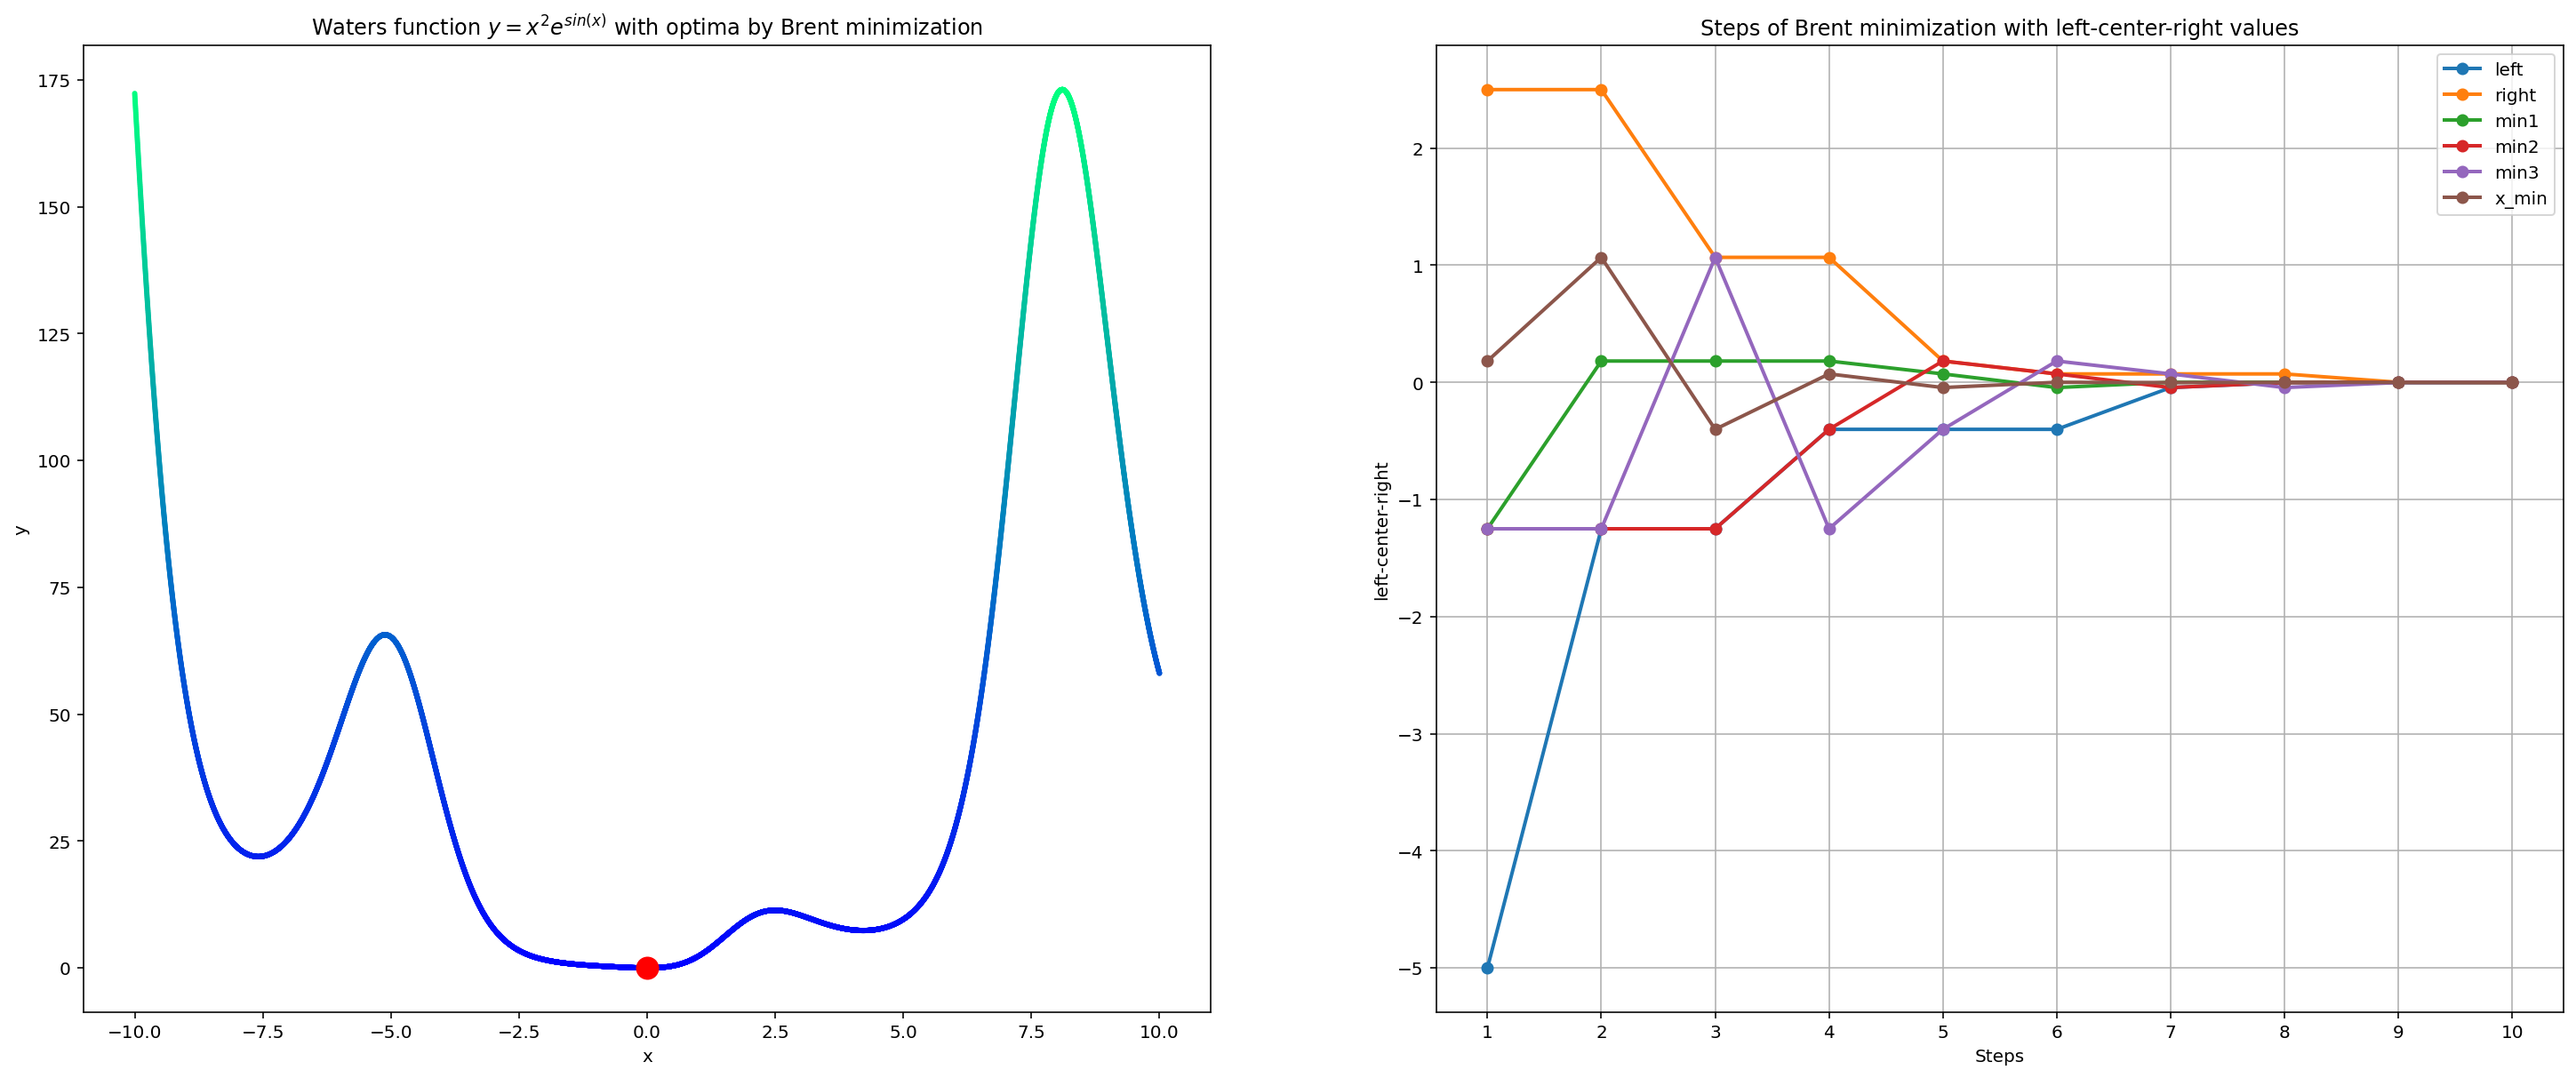

In [ ]:
show_minimizationresults(func, toptima_brent, tsteps_brent, thistory_brent, ["left", "right", "min1", "min2", "min3", "x_min"], "Brent")

# **Benchmark of minimization methods:**

In [ ]:
optima_dichotomic, steps_dichotomic, history_dichotomic, calls_dichotomic = minimize_dichotomic(func, left, right, eps)
optima_goldenratio, steps_goldenratio, history_goldenratio, calls_goldenratio = minimize_goldenratio(func, left, right, eps)
optima_fib, steps_fib, history_fib, calls_fib = minimize_fibonacci(func, left, right, eps)
optima_parabolic, steps_parabolic, history_parabolic, calls_parabolic = minimize_parabolic(func, left, right, eps)
optima_brent, steps_brent, history_brent, calls_brent = minimize_brent(func, left, right, eps)

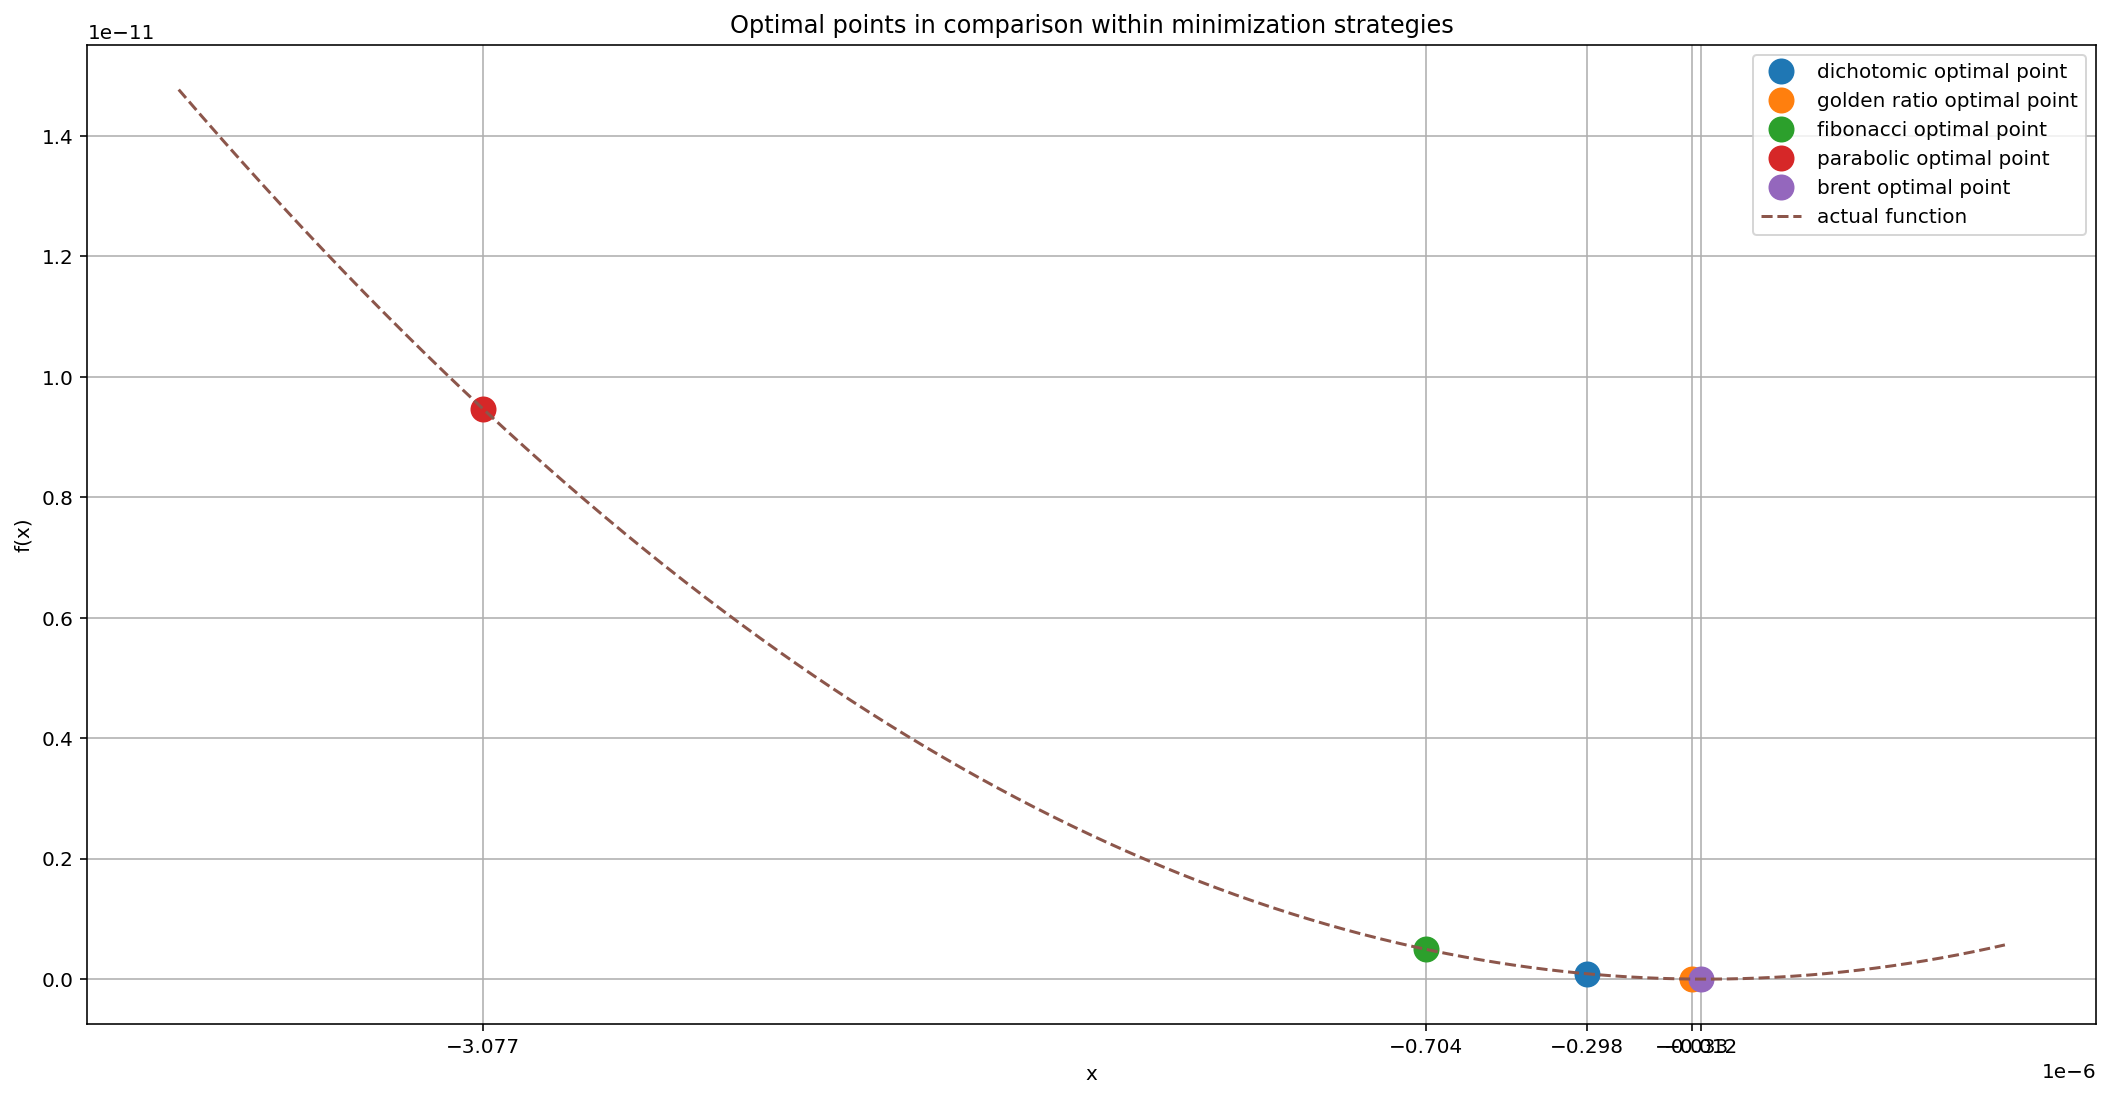

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(18, 9))
labels_benchmark = ["dichotomic", "golden ratio", "fibonacci", "parabolic", "brent"]
optimas = [optima_dichotomic, optima_goldenratio, optima_fib, optima_parabolic, optima_brent]
optimal_values = [func(optima) for optima in optimas]
for i in range(len(optimas)):
    ax.plot(optimas[i], optimal_values[i], "o", markersize=12, label=f"{labels_benchmark[i]} optimal point")
view_addition = (max(optimas) - min(optimas)) / 4
arg_benchmark = np.linspace(min(optimas) - view_addition, max(optimas) + view_addition, 1000)
values_benchmark = [func(arg) for arg in arg_benchmark]
ax.plot(arg_benchmark, values_benchmark, "--", label="actual function")
ax.set(title="Optimal points in comparison within minimization strategies",
       xlabel="x", ylabel="f(x)", xticks=optimas)
ax.legend()
plt.grid()